## 연합뉴스 타이틀 주제 분류 데이터 탐색과 시각화
* 데이터셋 출처 : 
    * [뉴스 토픽 분류 AI 경진대회 - DACON](https://dacon.io/competitions/official/235747/overview/description)

In [1]:
# 실습에서 wordcloud 를 사용하기 때문에 설치되어 있지 않다면 설치를 해주세요!
# wordcloud 설치 아나콘다 사용시 conda 명령어 설치 권장
# !pip install wordcloud
# !conda install -c conda-forge wordcloud
# !pip install koreanize_matplotlib

## 라이브러리 로드

In [2]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 한글 폰트 확인

<Axes: title={'center': '한글'}>

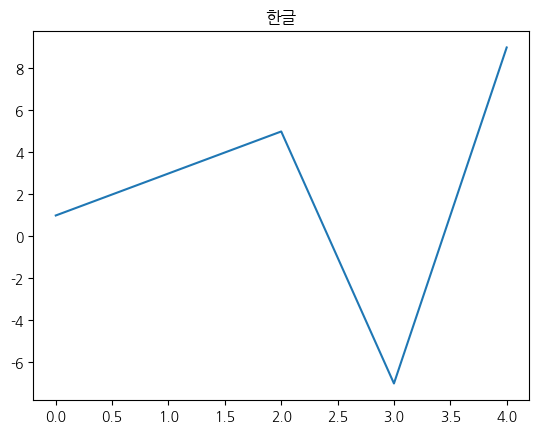

In [3]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 데이터 로드

In [4]:
# 학습, 예측 데이터셋을 불러오고 shape 로 행과 열의 크기를 출력합니다.
train = pd.read_csv("data/klue/train_data.csv")
test = pd.read_csv("data/klue/test_data.csv")
train.shape, test.shape

((45654, 3), (9131, 2))

In [5]:
# 토픽을 불러옵니다.
topic = pd.read_csv("data/klue/topic_dict.csv")
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [6]:
# head 로 train의 상위 5개 데이터를 가져옵니다.
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [7]:
# head 로 test의 상위 5개 데이터를 가져옵니다.
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


## 전처리를 위한 데이터 병합
* 학습, 예측 세트를 똑같이 전처리 해주기 위해 각각 같은 방법을 적용해 줄 수도 있지만
* 두 데이터를 병합해서 전처리를 해주고 다시 나눠주겠습니다.

In [8]:
# 토픽에 어떤 값이 있는지 values로 봅니다. 
topic["topic"].values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

## concat
<img src="https://pandas.pydata.org/docs/_images/08_concat_row.svg" width="500">

In [9]:
# 전처리를 위해 concat으로 데이터 병합
raw = pd.concat([train, test])
raw.shape

(54785, 3)

In [10]:
# head
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [11]:
# tail
raw.tail()

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


## merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>

* 실제 토픽명을 볼 수 있도록 topic_idx 를 키값으로 merge 합니다.

In [12]:
# raw 를 topic 데이터와 merge 합니다.
df = raw.merge(topic, how="left")
df.shape

(54785, 4)

In [13]:
# merge 가 잘 되었는지 head 로 확인
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


## 정답값 빈도수
* train 에서 제공하는 정답값의 빈도수

In [14]:
# test는 결측치로 되어 있기 때문에 빈도수에 포함되지 않습니다.
# topic_idx 의 빈도수를 구합니다.
df["topic_idx"].value_counts()

topic_idx
4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: count, dtype: int64

In [15]:
# topic 의 빈도수를 구합니다.
df["topic"].value_counts()

topic
세계      7629
사회      7362
스포츠     6933
정치      6751
경제      6222
생활문화    5933
IT과학    4824
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='topic'>

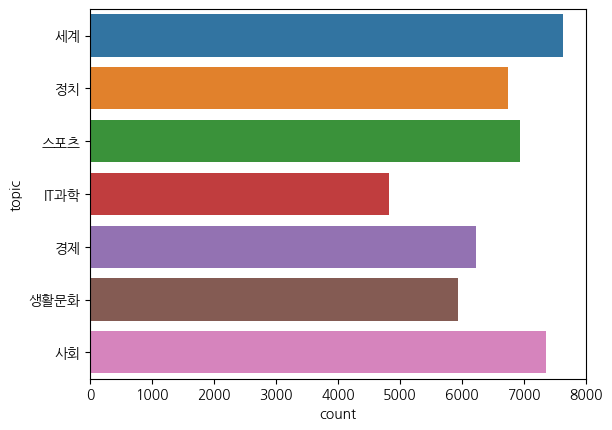

In [16]:
# df 로 빈도수를 구했지만 test 데이터는 topic이 결측치라 포함되지 않습니다. 
sns.countplot(data=df, y="topic")

## 문자 길이

In [17]:
# 문자, 단어 빈도수 파생변수 만들기
df["len"] = df["title"].apply(lambda x : len(x))
df["word_count"] = df["title"].apply(lambda x : len(x.split()))
df["unique_word_count"] = df["title"].apply(lambda x : len(set(x.split())))

In [18]:
# 파생변수가 잘 만들어졌는지 확인하기
df.head()

,index,title,topic_idx,topic,len,word_count,unique_word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


<Axes: xlabel='unique_word_count', ylabel='Count'>

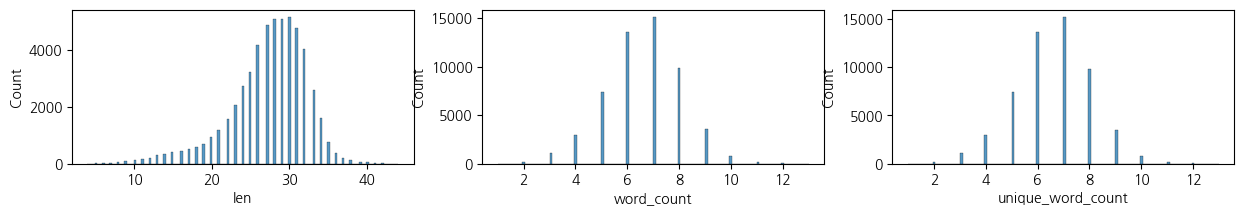

In [19]:
# 서브플롯을 통해  "len", "word_count", "unique_word_count"의 histplot 을 시각화 합니다.
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.histplot(df["len"], ax=axes[0])
sns.histplot(df["word_count"], ax=axes[1])
sns.histplot(df["unique_word_count"], ax=axes[2])

In [20]:
# "len", "word_count", "unique_word_count" 의 기술통계 값을 구합니다.
df[["len", "word_count", "unique_word_count"]].describe()

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

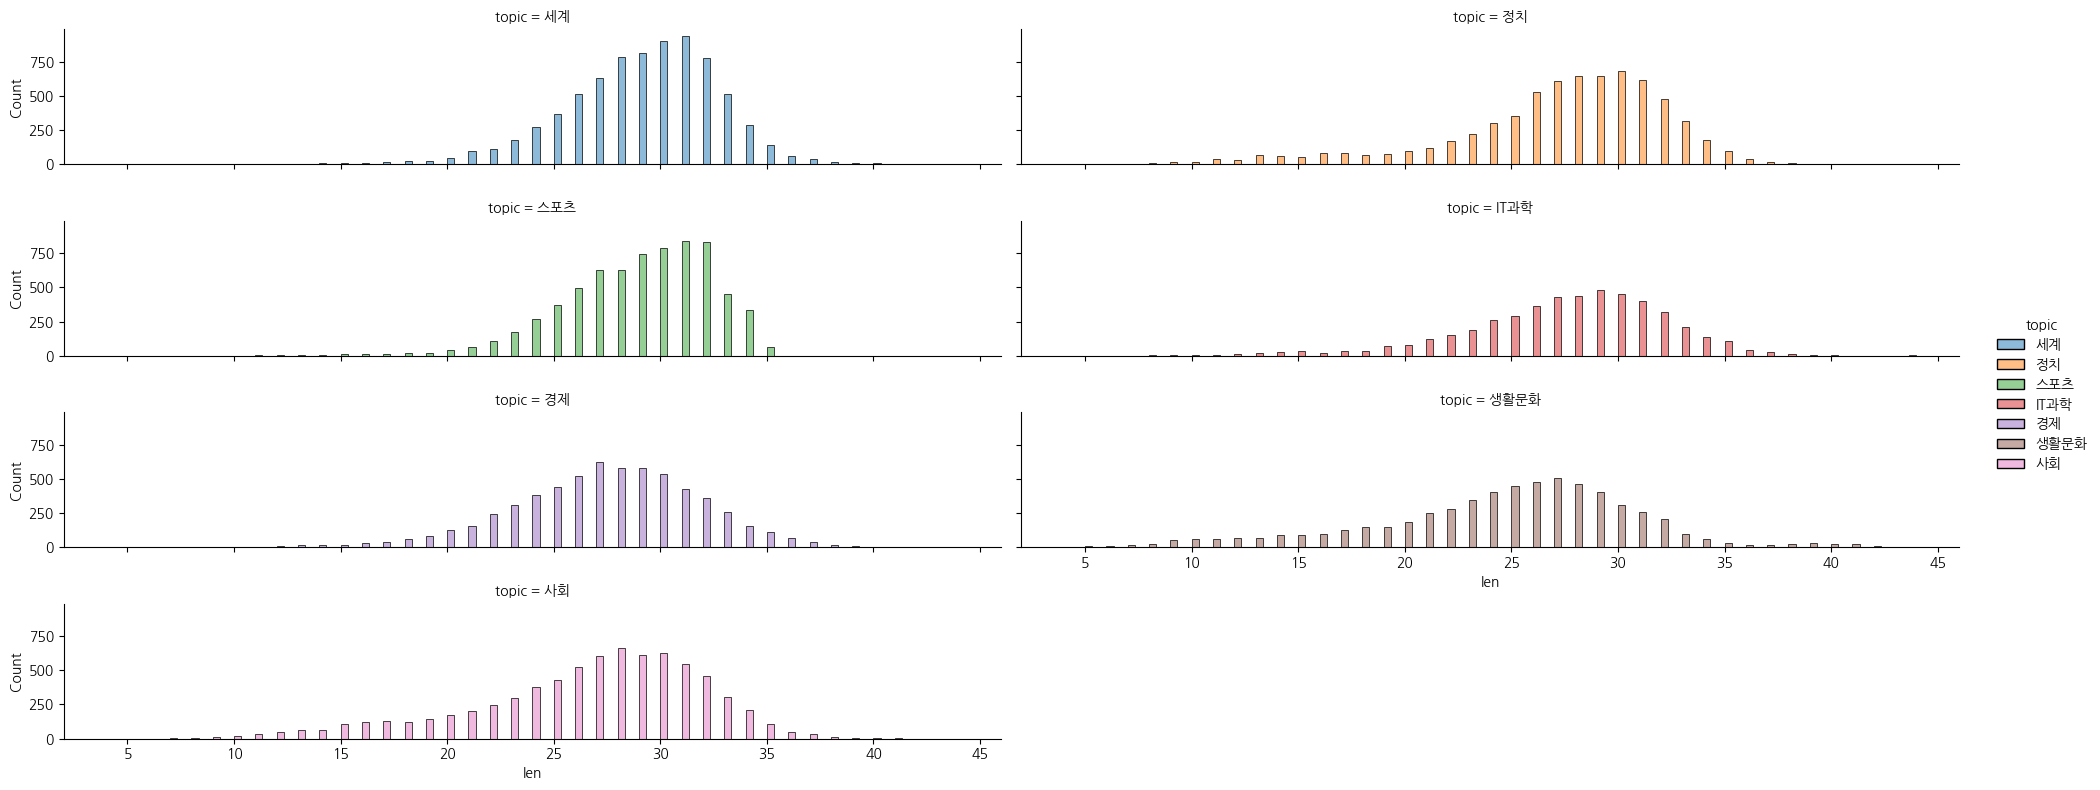

In [21]:
# 문장길이
# displot 으로 topic 별 "len" 의 histplot 시각화 하기
# data=df, x="len", kind="hist", hue="topic", col="topic", col_wrap=2, aspect=5, height=2
sns.displot(data=df, x="len", kind="hist", 
            hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

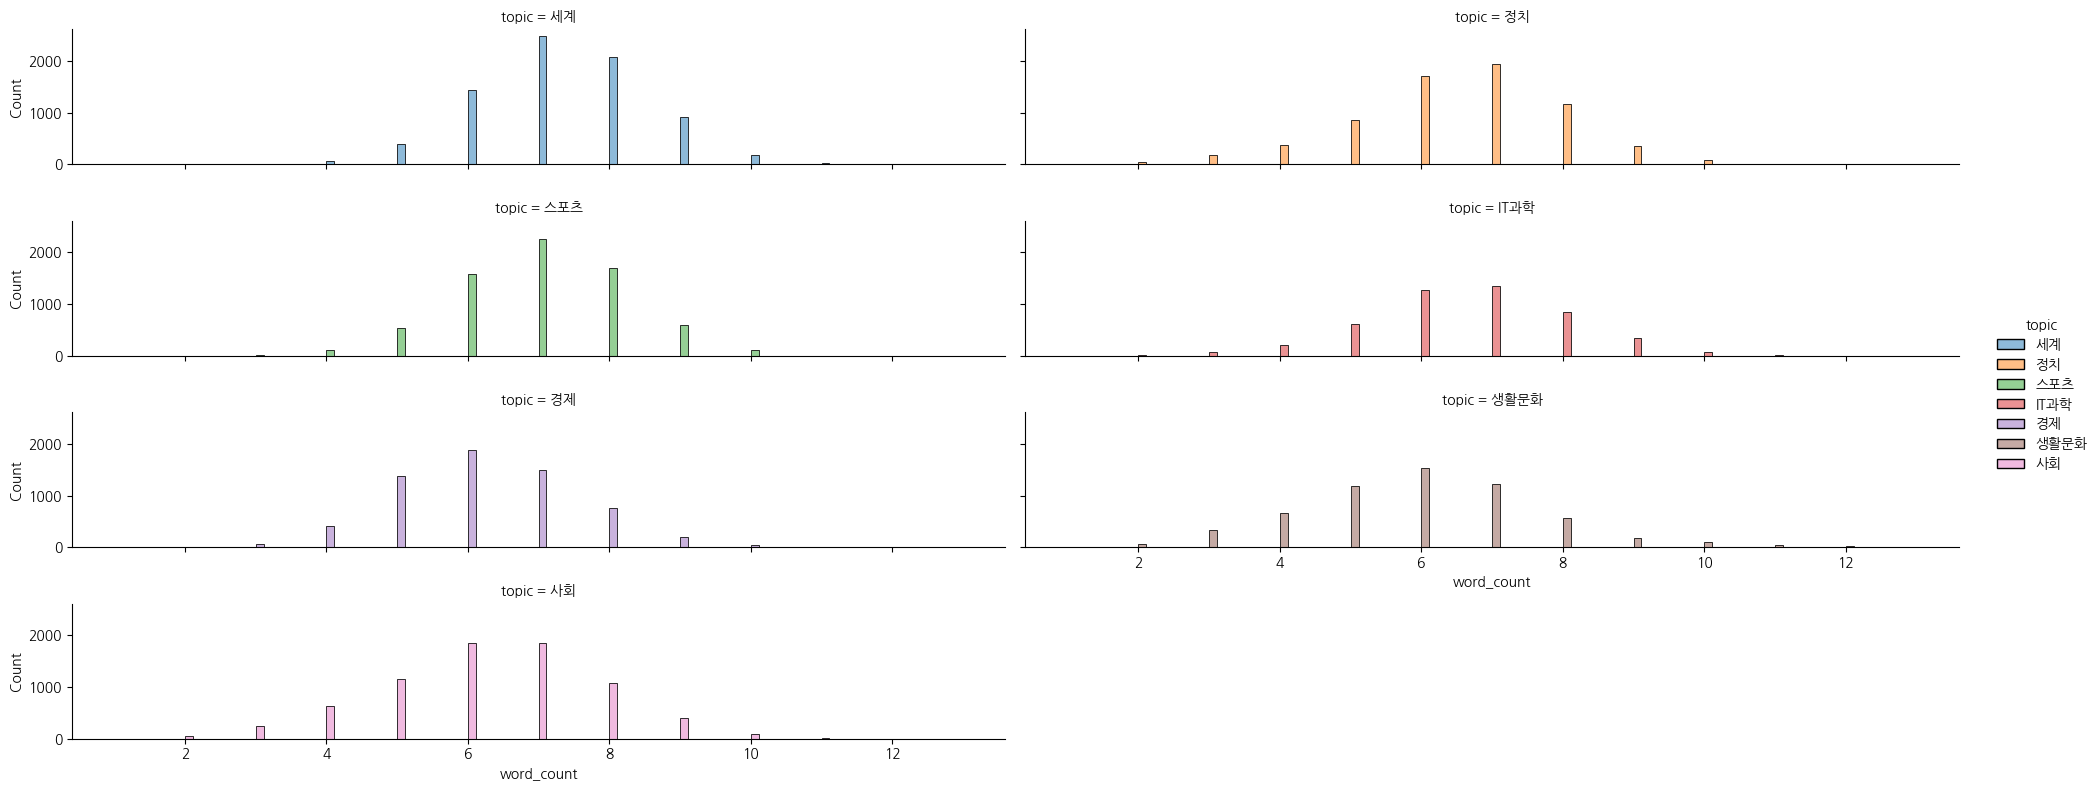

In [22]:
# 단어 수
# displot 으로 topic 별 "word_count" 의 histplot 시각화 하기
sns.displot(data=df, x="word_count", kind="hist",
            hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

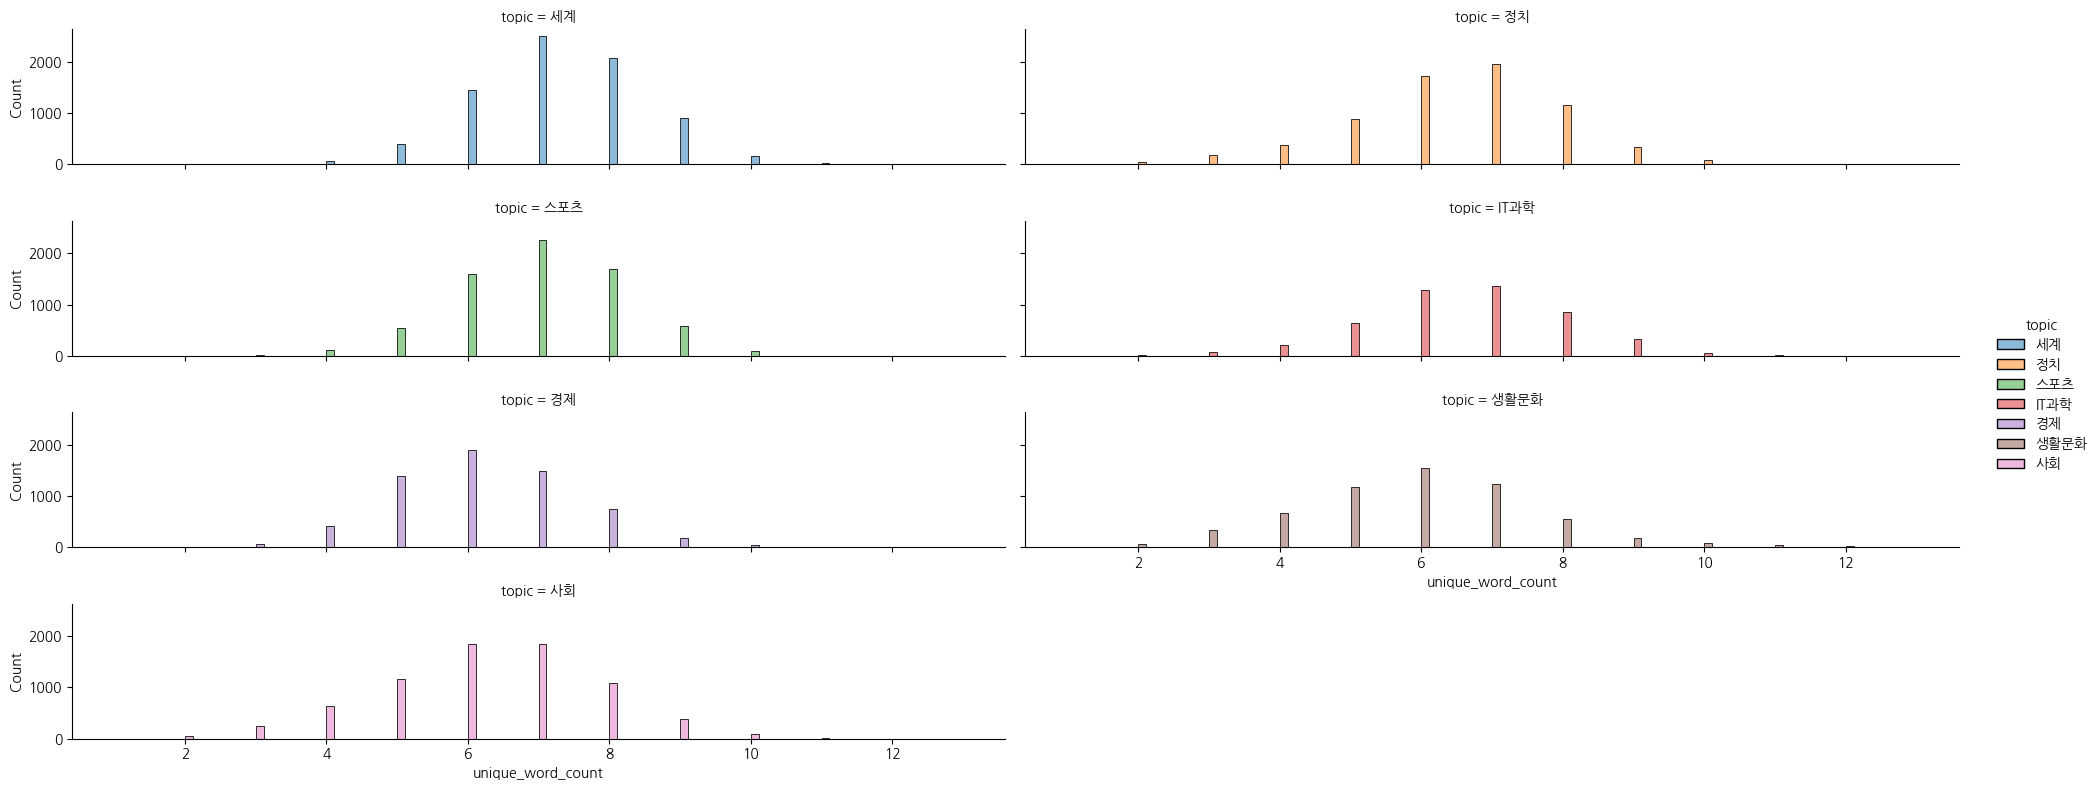

In [23]:
# 중복 제거 단어 수
# displot 으로 topic 별 "unique_word_count" 의 histplot 시각화 하기
sns.displot(data=df, x="unique_word_count", kind="hist",
            hue="topic", col="topic", col_wrap=2, aspect=5, height=2)

<Axes: >

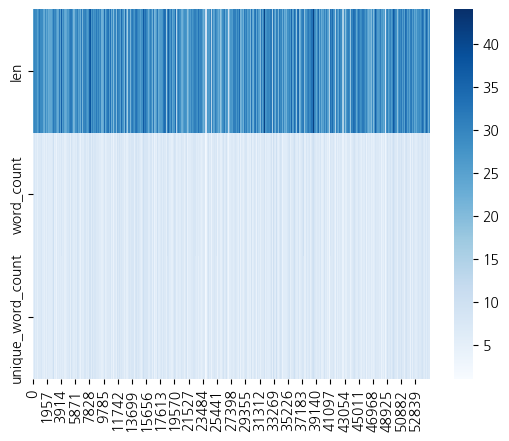

In [24]:
# heatmap 을 통한 "len", "word_count", "unique_word_count" 시각화
sns.heatmap(df[["len", "word_count", "unique_word_count"]].T, cmap="Blues")

## 문자 전처리
### 숫자 제거

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


In [25]:
# 정규표현식의 re.sub 을 통해 숫자제거
import re
df["title"] = df["title"].map(lambda x : re.sub("[0-9]", "", x))

In [26]:
# 판다스의 str.replace 기능을 통해 제거
df["title"] = df["title"].str.replace("[0-9]", "", regex=True)

### 특수 문자 제거

In [27]:
# 특수 문자 제거 시 구두점 참고
import string

punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
# 특수 문자 사용시 정규표현식에서 메타 문자로 특별한 의미를 갖기 때문에 역슬래시를 통해 예외처리를 해주어야 합니다.
df["title"] = df["title"].str.replace("[!\"\$\*]", "", regex=True)

### 영문자는 모두 소문자로 변경
* 대소문자가 섞여 있으면 다른 다른 단어로 다루기 때문

In [29]:
df["title"] = df["title"].str.lower()

### 한글, 영문과 공백만 남기고 모두 제거

In [30]:
# 정규표현식 [^ㄱ-ㅎㅏ-ㅣ가-힣 ] 을 사용하면 한글과 공백만 남기고 제거하게 됩니다.
df["title"] = df["title"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", " ", regex=True)

### 공백 여러 개는 하나로

In [31]:
# 공백 여러 개 전처리 예시
re.sub("[ ]+", " ", "공백             전처리")

'공백 전처리'

In [32]:
# 여러 개의 공백을 하나의 공백으로 치환해 줍니다.
df["title"] = df["title"].str.replace("[ ]+", " ", regex=True)
df["title"]

0                인천 핀란드 항공기 결항 휴가철 여행객 분통
1             실리콘밸리 넘어서겠다 구글 조원 들여 전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        nyt 클린턴 측근 기업 특수관계 조명 공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780              인천 오후 시분 대설주의보 눈 cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심 지원책 강구
Name: title, Length: 54785, dtype: object

### 불용어 제거

In [33]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다', 
             '그리고', '입니다', '그', '등', '이런', '및','제', '더']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [34]:
# map을 사용하여 불용어 제거하기
df["title"] = df["title"].map(remove_stopwords)
df["title"]

0                인천 핀란드 항공기 결항 휴가철 여행객 분통
1             실리콘밸리 넘어서겠다 구글 조원 들여 전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        nyt 클린턴 측근 기업 특수관계 조명 공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780              인천 오후 시분 대설주의보 눈 cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑tv 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심 지원책 강구
Name: title, Length: 54785, dtype: object

## 워드클라우드

* https://github.com/amueller/word_cloud

* 불용어, 자주 등장하는 단어, 주제별 단어 등을 시각화 하기에 좋습니다.

In [35]:
# wordcloud 설치 아나콘다 사용시 conda 명령어 설치 권장
# !pip install wordcloud
# !conda install -c conda-forge wordcloud

In [36]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=["합니다", "입니다"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

In [37]:
# content 변수에 "내용_전처리"를 list형식으로 담아 줍니다.
# join()을 이용하여 변수 content를 리스트에서 문자열로 변환해 줍니다.
content = " ".join(df["title"].tolist())
content[:500]

'인천 핀란드 항공기 결항 휴가철 여행객 분통 실리콘밸리 넘어서겠다 구글 조원 들여 전역 거점화 이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것 nyt 클린턴 측근 기업 특수관계 조명 공과 사 맞물려종합 시진핑 트럼프에 중미 무역협상 조속 타결 희망 팔레스타인 가자지구서 세 소년 이스라엘군 총격에 사망 인도 년 만에 파키스탄 공습 테러 캠프 폭격종합보  대선 tv토론 음담패설 만회실패 트럼프 사과 대신 빌클린턴 공격해 역효과 푸틴 한반도 상황 진전 위한 방안 김정은 위원장과 논의 특검 면죄부 받은 트럼프 스캔들 보도 언론 맹공 국민의 적  오키나와서 열린 강제징용 노동자 추도식 이란서 최고지도자 모욕 혐의 미국인에 징역 년 선고 카니발 축제 보러 가자 브라질 리우에 대형 유람선 행렬  올랜도 병원 최악 총기 테러 부상자 치료비 안 받는다  대기업 올해 평균 임금 인상 wmo 엘니뇨 여전히 강력 분기엔 소멸될 듯 이스라엘 네타냐후 유대교도 병역문제로 연정 협상 진통 uae 사우디'

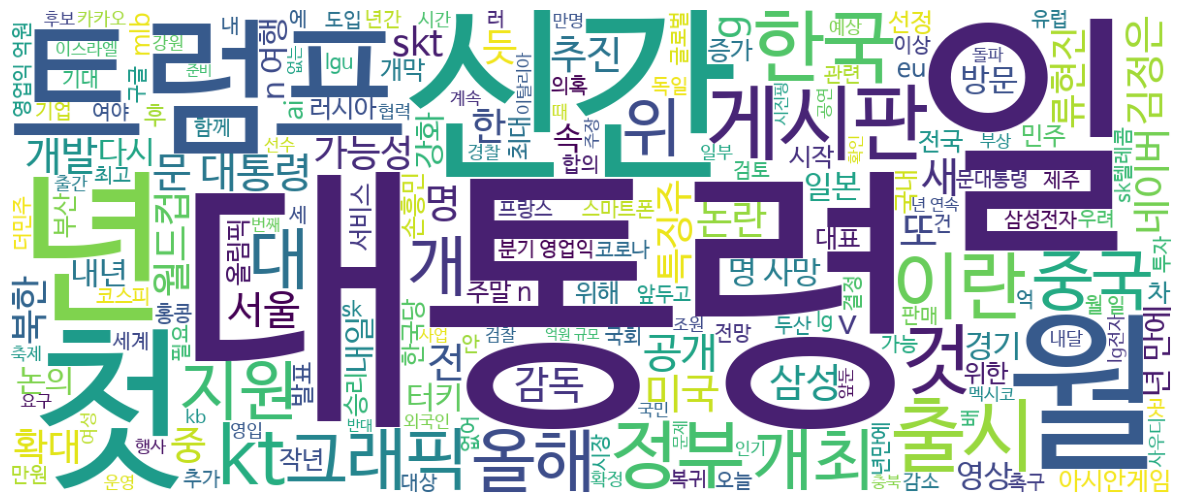

In [38]:
# content를 워드클라우드로 시각화 해봅니다.
display_word_cloud(content)

## 특정 토픽만 워드클라우드 시각화

In [39]:
# topic 의 unique 값만 보기
df["topic"].unique()

array(['세계', '정치', '스포츠', 'IT과학', '경제', '생활문화', '사회', nan], dtype=object)

In [40]:
# content 변수에 "내용_전처리"를 list형식으로 담아 줍니다.
# join()을 이용하여 변수 content를 리스트에서 문자열로 변환해 줍니다.
sub_title = df.loc[df["topic"].isin(["IT과학"]), "title"]
content = " ".join(sub_title.tolist())
content[:500]

'지카바이러스도 규명한 초저온전자현미경 신약연구에 유용 증강현실 알파고 이어 포켓몬 고 거센 it 광풍 ai 월드컵 생생한 현장 중계도 이세돌 알파고 집중력 사람이 이기긴 어렵다 일문일답종합보 올해 휴대폰 국내 생산량 천만대 년전의  lg 갤노트 겨냥한 v 티저 광고 편으로 선전포고 kt스카이라이프 알뜰폰 판매 전용 요금제 종 출시 안 쓰는 tv 주파수 농어촌 무선인터넷에 쓴다 과학을 즐기세요 월 과학의 달 행사 여건 풍성 과기정통부 실험실 창업 사업공모 총 억원 규모 삼성전자 g 기술로 mwc 공식방송 단독 생중계 강력해진 알파고 인간의 직관도 모방해 학습 어디서든 파티 lg g 씽큐 붐박스 스피커 눈길 kt 년 만에 영업이익 천억 돌파 깜짝 실적종합보 인공지능 박지성 나올까 kaist서 세계 첫 ai월드컵 g 만난 스마트 카 mwc서도 흥행몰이 이어질까 lg gx 듀얼 스크린 브라질 출시 중남미 공략 가속 인터넷진흥원 우수 정보보호 기술 지정제도 시행 skt mwc서 gbps 속도'

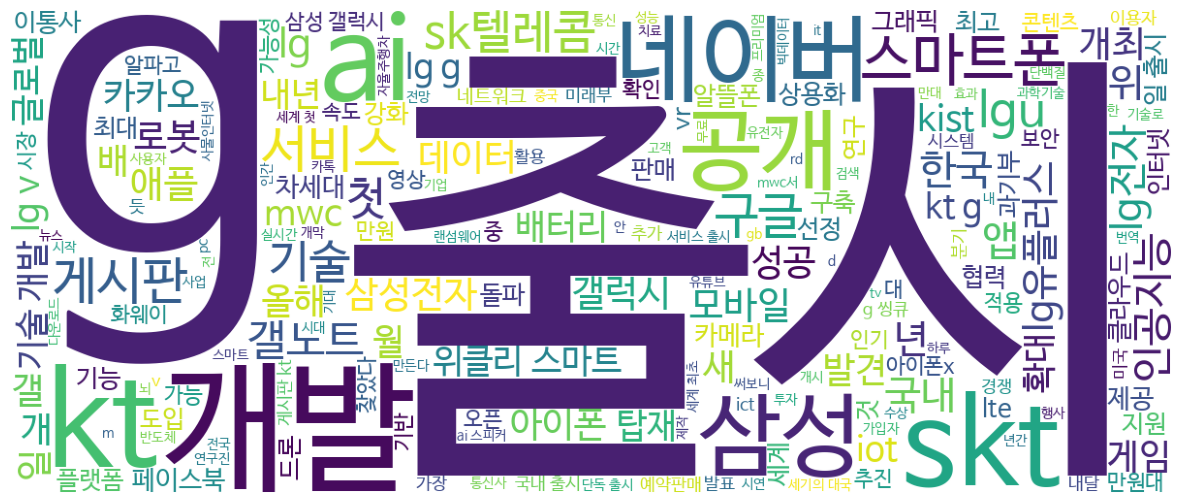

In [41]:
# display_word_cloud 로 시각화
display_word_cloud(content)